In [1]:
library(ggplot2)
library(tidyverse)

Warning message:
“replacing previous import ‘vctrs::data_frame’ by ‘tibble::data_frame’ when loading ‘dplyr’”
── Attaching packages ───────────────────────────────────────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.0.4     ✔ dplyr   1.0.0
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0
✔ purrr   0.3.4     

── Conflicts ──────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
f1 <- list.files(path= 'Analysis/',pattern= '*.zip',recursive = TRUE)

In [3]:
library(stringr)
setwd("//home//ab//Downloads//Analysis//")
for(i in f1){
    unzip(i)
    
 
}

In [4]:
x <- list.files(pattern = "^summary(.*)txt$")

In [5]:
y = list.files(full.name = TRUE)

In [6]:
y

[1] "./ATTG_R1_fastqc"       "./ATTG_R1_fastqc.zip"   "./ATTG_R2_fastqc"      
 [4] "./ATTG_R2_fastqc.zip"   "./Fastqc.ipynb"         "./Fastqc1.ipynb"       
 [7] "./SRR020192_fastqc"     "./SRR020192_fastqc.zip" "./Test.txt"            
[10] "./Test.zip"             "./Untitled.ipynb"

In [7]:
processFile <- function(f) {
  df <- read.csv(f,sep='\t',col.names=c("Status", "Category", "Filename"))
  print(df)
  print(ggplot(df, aes_string("Category", "Filename", fill = "Status")) + geom_tile(colour = "grey20", size = 0.2) + scale_fill_manual(values=c("#999999", "#E69F00", "#56B4E9")) +
        labs(x = "QC Category", y = "Filename") +
        scale_x_discrete(expand = c(0,0)) +
        scale_y_discrete(expand = c(0,0)) +
        theme_bw() +
        theme(axis.text.x = element_text(
            angle = 90, hjust = 1, vjust = 0.5
        )))
  file.info(f)$size # dummy result
}

In [8]:
in.list <- list.files(pattern = "^summary(.*)txt$",recursive = T, full.names = T)

   Status                     Category      Filename
1    FAIL    Per base sequence quality ATTG_R1.fastq
2    WARN    Per tile sequence quality ATTG_R1.fastq
3    PASS  Per sequence quality scores ATTG_R1.fastq
4    FAIL    Per base sequence content ATTG_R1.fastq
5    FAIL      Per sequence GC content ATTG_R1.fastq
6    PASS           Per base N content ATTG_R1.fastq
7    PASS Sequence Length Distribution ATTG_R1.fastq
8    FAIL  Sequence Duplication Levels ATTG_R1.fastq
9    FAIL    Overrepresented sequences ATTG_R1.fastq
10   FAIL              Adapter Content ATTG_R1.fastq
11   FAIL                 Kmer Content ATTG_R1.fastq
   Status                     Category      Filename
1    FAIL    Per base sequence quality ATTG_R2.fastq
2    FAIL    Per tile sequence quality ATTG_R2.fastq
3    PASS  Per sequence quality scores ATTG_R2.fastq
4    FAIL    Per base sequence content ATTG_R2.fastq
5    FAIL      Per sequence GC content ATTG_R2.fastq
6    PASS           Per base N content ATTG_R2

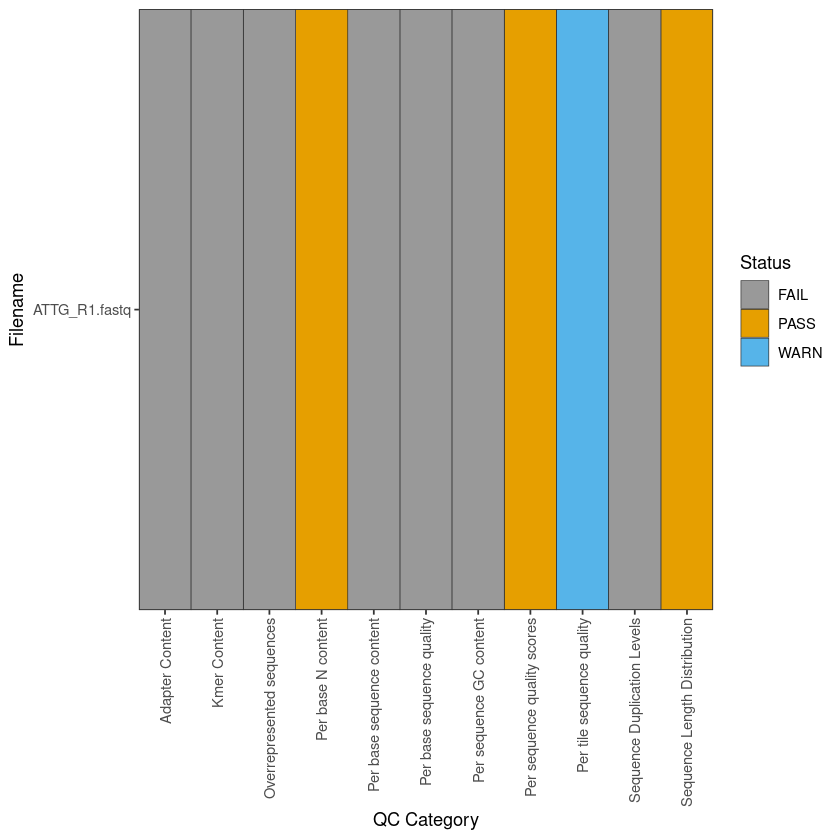

  Status                     Category           Filename
1   PASS    Per base sequence quality SRR020192.fastq.gz
2   PASS  Per sequence quality scores SRR020192.fastq.gz
3   FAIL    Per base sequence content SRR020192.fastq.gz
4   FAIL      Per sequence GC content SRR020192.fastq.gz
5   WARN           Per base N content SRR020192.fastq.gz
6   WARN Sequence Length Distribution SRR020192.fastq.gz
7   FAIL  Sequence Duplication Levels SRR020192.fastq.gz
8   FAIL    Overrepresented sequences SRR020192.fastq.gz
9   PASS              Adapter Content SRR020192.fastq.gz


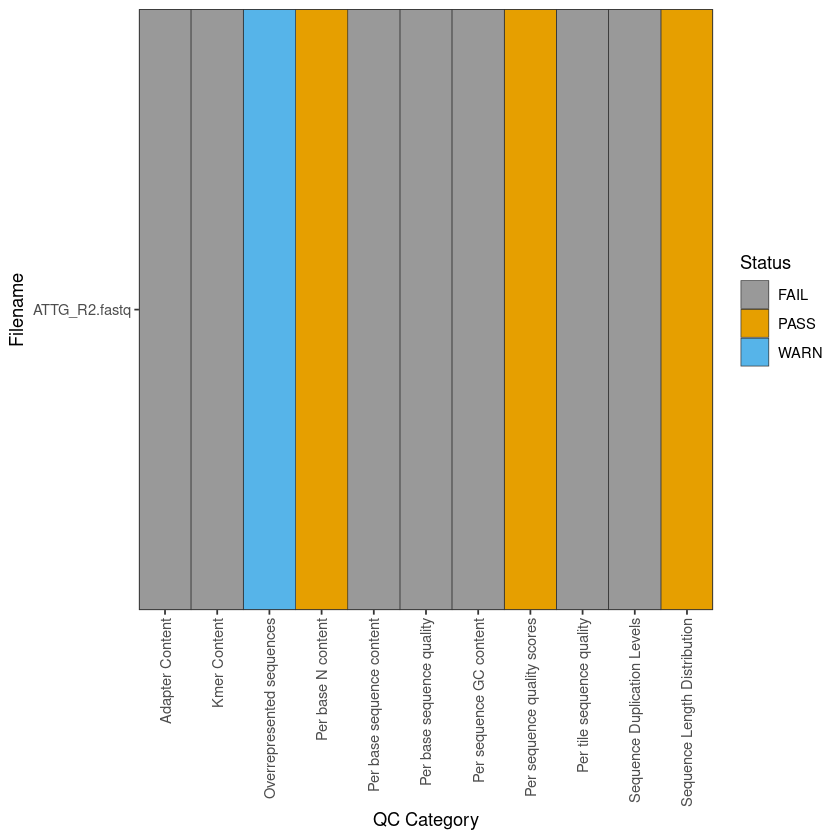

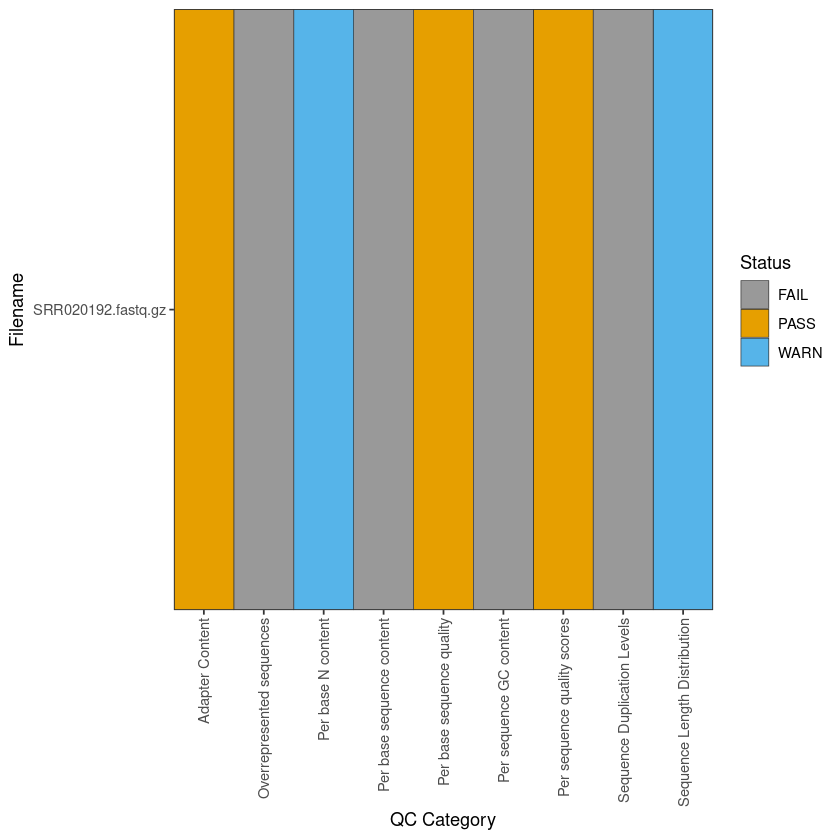

In [9]:
result <- sapply(in.list, processFile)

In [10]:
df <- in.list %>% map_df(read.table, sep='\t',col.names=c("Status", "Category", "Filename"))

In [11]:
df

Status,Category,Filename
<chr>,<chr>,<chr>
PASS,Basic Statistics,ATTG_R1.fastq
FAIL,Per base sequence quality,ATTG_R1.fastq
WARN,Per tile sequence quality,ATTG_R1.fastq
PASS,Per sequence quality scores,ATTG_R1.fastq
FAIL,Per base sequence content,ATTG_R1.fastq
FAIL,Per sequence GC content,ATTG_R1.fastq
PASS,Per base N content,ATTG_R1.fastq
PASS,Sequence Length Distribution,ATTG_R1.fastq
FAIL,Sequence Duplication Levels,ATTG_R1.fastq


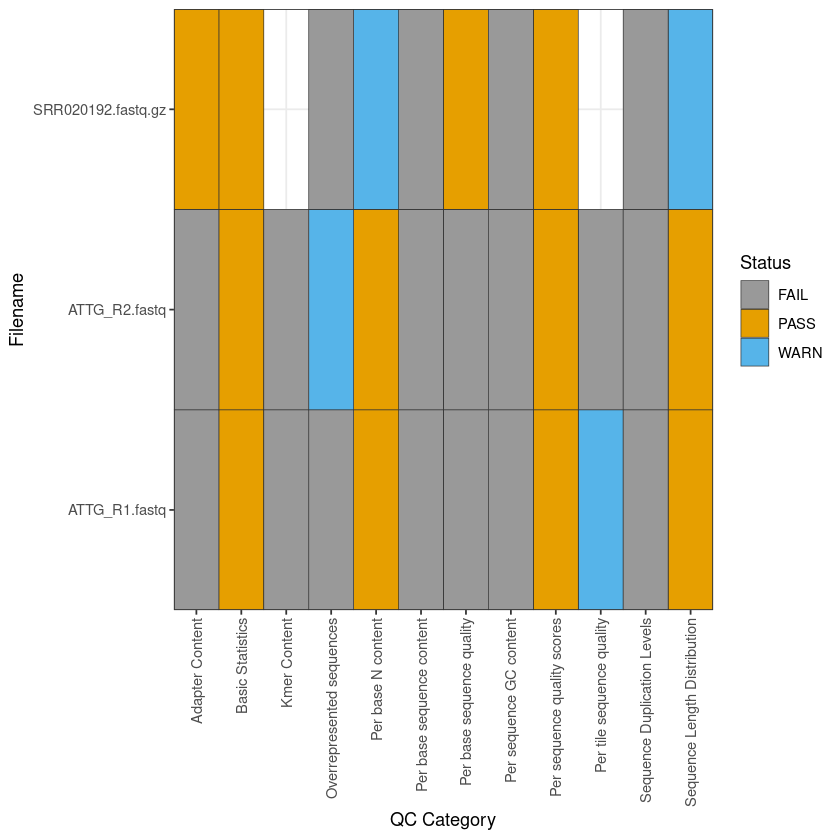

In [12]:
 ggplot(df, aes_string("Category", "Filename", fill = "Status")) + geom_tile(colour = "grey20", size = 0.2) + scale_fill_manual(values=c("#999999", "#E69F00", "#56B4E9")) +
        labs(x = "QC Category", y = "Filename") +
        scale_x_discrete(expand = c(0,0)) +
        scale_y_discrete(expand = c(0,0)) +
        theme_bw() +
        theme(axis.text.x = element_text(
            angle = 90, hjust = 1, vjust = 0.5
        ))

In [13]:
fas <- list.files(pattern = "^fastqc_data(.*)txt$",recursive = T, full.names = T)

In [14]:
fas

[1] "./ATTG_R1_fastqc/fastqc_data.txt"   "./ATTG_R2_fastqc/fastqc_data.txt"  
[3] "./SRR020192_fastqc/fastqc_data.txt"

In [38]:
library(scales)
processFile1 <- function(f) {
  raw.data <- readr::read_file(f)
  f0 = str_replace(f,"/fastqc_data.txt","")
  f01 = paste(f0,"_gc",sep="_")
  summary.data <- ""
  all.data <- paste0(raw.data, summary.data)
  all.data <- all.data %>% gsub("#", "", .) %>% gsub(">>", "", .) %>% strsplit("END_MODULE") %>% unlist()
  module = "Per sequence GC content"
  index <- grep(module, all.data, ignore.case = TRUE)
  f1 <- read_tsv(all.data[index[1]])
  f2 <- as.data.frame(f1)
  f3 <- f2[-1]
  f01 <- f3$fail
 # f4 <- label_percent()(f01)
  print(f01)
  file.info(f)$size # dummy result
}

In [39]:
result <- sapply(fas, processFile1)

  [1] "Count"  "0.0"    "0.0"    "0.0"    "0.0"    "0.0"    "0.0"    "0.0"   
  [9] "0.0"    "0.5"    "0.5"    "1.0"    "1.5"    "1.0"    "1.0"    "1.5"   
 [17] "1.5"    "1.5"    "2.5"    "2.0"    "1.0"    "2.5"    "4.0"    "5.0"   
 [25] "31.5"   "41.0"   "25.0"   "18.5"   "24.0"   "32.0"   "32.0"   "59.5"  
 [33] "83.0"   "105.5"  "155.5"  "208.0"  "250.0"  "307.5"  "348.0"  "397.5" 
 [41] "589.0"  "797.5"  "1182.0" "1612.5" "2066.5" "2408.0" "2326.0" "2186.5"
 [49] "1943.5" "1735.0" "1471.0" "1230.0" "1235.0" "1255.5" "1152.5" "871.5" 
 [57] "693.5"  "678.0"  "497.5"  "369.5"  "379.5"  "224.0"  "125.0"  "139.0" 
 [65] "172.0"  "152.5"  "60.5"   "26.0"   "33.5"   "35.5"   "35.0"   "27.5"  
 [73] "14.0"   "20.0"   "19.0"   "4.5"    "3.0"    "4.5"    "3.5"    "1.0"   
 [81] "1.5"    "1.0"    "0.0"    "0.0"    "0.0"    "0.5"    "0.5"    "0.0"   
 [89] "0.0"    "0.0"    "0.0"    "0.0"    "0.0"    "0.0"    "0.0"    "0.0"   
 [97] "0.0"    "0.0"    "0.0"    "0.0"    "0.0"    "0.0"   
  [1